# Customer Segmentation

Creadited by-Omkar V. Bhujbal

In [1]:
##Importing Necessary Libraries
import numpy as np                #Using Data Manipulation
import pandas as pd               #Using Data Manipulation
import matplotlib.pyplot as plt   #Using Data Visualization
import seaborn as sns             #Using Data Visualization

In [2]:
##Read Customer Segmentation dataset
df=pd.read_csv("E:\\Dataset\\customer-segmentation-dataset\\Mall_customers.csv",index_col=["CustomerID"])

In [3]:
##Show First Five Row in the dataset
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
##Checking the Column Name
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [5]:
##Rename the columns 
df=df.rename(columns={"Annual Income (k$)":"Annual Income","Spending Score (1-100)":"Score"})

In [6]:
##Check the rename columns name
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Score'], dtype='object')

In [7]:
##Check the NAN VAlue or Empty Value in the Data
df.isna().sum()

Gender           0
Age              0
Annual Income    0
Score            0
dtype: int64

Interpretation:- Data can not contain Null Value

In [8]:
##Information about Datatypes in Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender           200 non-null object
Age              200 non-null int64
Annual Income    200 non-null int64
Score            200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [9]:
##Convert Object datatype into integer using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [10]:
##Check Gender Column is Encoded or not
df.head()

,Gender,Age,Annual Income,Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [11]:
##Describe the Data
df.describe()

,Gender,Age,Annual Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


# Data Visualization

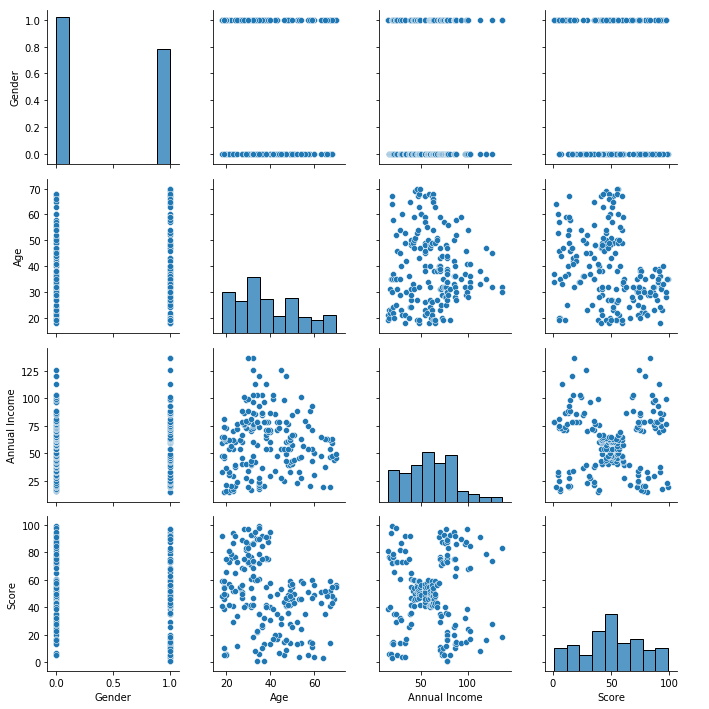

In [12]:
##Graphical Representation of Every Column With Each other
sns.pairplot(df)

Interpretation:- Here, We can check the Graphical representation of column with another Other. The column with same name show the graph in barplot. We can Visualize Data for Understanding Purpose.

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

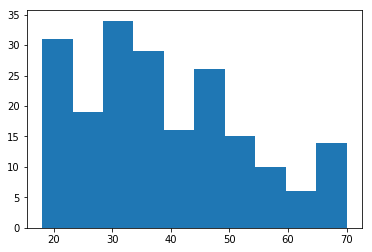

In [13]:
##Plotting Age column Histogram 
plt.hist(df["Age"])

Interpretation:-Here, We can check Which Age type customer are more in the Mall. In graph We can see that 30-40 Age people are more in the Mall

(array([112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

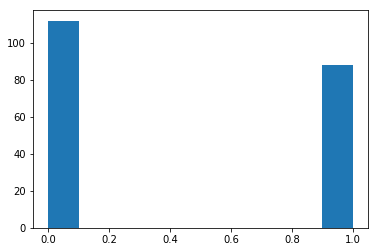

In [14]:
##Plotting Gender Column Histogram
plt.hist(df["Gender"])

Interpretation:-We can check Which Gender type people or customer are more in Mall for Shopping. Zero Represent the Female,so Female are more as compare to male in the Mall 

Text(0, 0.5, 'Gender')

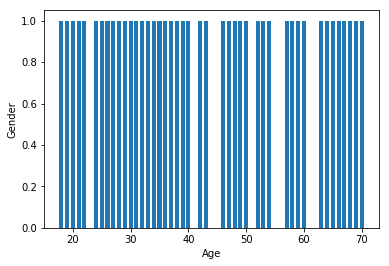

In [15]:
##Plotting barplot in Age and Gender Column
plt.bar(df["Age"],df["Gender"],width=0.7)
plt.xlabel("Age")
plt.ylabel("Gender")

# Elbow Method

The elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis

# KMeans Algorithm

In [16]:
##Importing Kmeans Library from sklearn
from sklearn.cluster import KMeans

Selecting two features for model and visualization of Clusters

In [17]:
##Selecting two features 
X=df[["Annual Income","Score"]]

In [18]:
##Show X
X

,Annual Income,Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
6,17,76
7,18,6
8,18,94
9,19,3


In [19]:
#finding optimal number of clusters using the elbow method  
K=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in K:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_)

Potting a graph of K Values vs inertia

Text(0, 0.5, 'Inertia(sum of squared distance)')

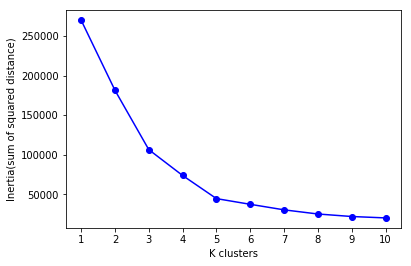

In [20]:
plt.plot(K,ssd,marker="o",color='b')
plt.xticks(K)
plt.xlabel("K clusters")
plt.ylabel("Inertia(sum of squared distance)")

From the above plot, we can see the elbow point is at 5. So the number of clusters here will be 5.

In [21]:
##Number of Cluster=5 and Fitting Model
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
##5 label in the model
label=model.labels_
label

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [23]:
center=model.cluster_centers_
center

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

# Cluster Visualization

Text(0.5, 1.0, 'Clusters of customers')

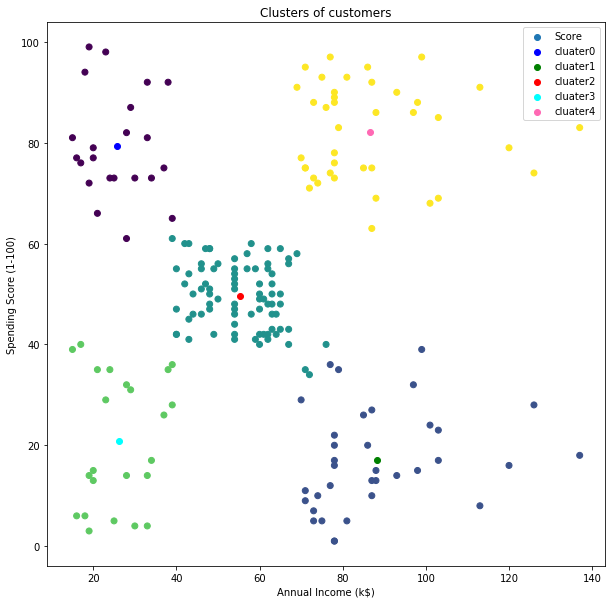

In [24]:
#plotting the clusters
fig=plt.figure(figsize=(10,10))  #Define the size of Graph
plt.scatter(df['Annual Income'],df['Score'],c=label)
color=["b","g","r","cyan","hotpink","y"]
for i in range(center.shape[0]):
    plt.scatter(center[i][0],center[i][1],color=color[i], label=str("cluater"+str(i)))
plt.legend()
plt.xlabel('Annual Income (k$)')     #X axis Label
plt.ylabel('Spending Score (1-100)') #Y axis Label
plt.title('Clusters of customers')   #Title of the grap

# Conclusion

We can see that the mall customers can be broadly grouped into 5 groups based on their purchases made in the mall.

1.Cluster0 shows the customers with average salary and average spending.

2.Cluster1 shows the customer has a high income but low spending, so we can categorize them as careful.

3.Cluster2 shows the low income and also low spending so they can be categorized as sensible.

4.Cluster3 shows the customers with low income with very high spending so they can be categorized as careless.

5.Cluster4 shows the customers with high income and high spending so they can be categorized as target, and these customers can be the most profitable customers for the mall owner.